<a href="https://colab.research.google.com/github/sungjin-kim-data/Ddareungi-EDA/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

서울 열린데이터 광장에서 제공하는 서울시 공공자전거 이용현황 데이터

 - Data1 : 서울특별시 공공자전거 대여소 정보
서울특별시 공공자전거 대여소 정보
서울특별시 공공자전거 대여소(따릉이) 현황정보입니다.
대여소의 이름, 관리번호, 위치정보와, 거치대수 정보를 제공합니다.
 - Data2 : 서울특별시 공공자전거 대여소별 이용정보(월별)
서울특별시 공공자전거 대여소별 대여, 반납 정보입니다.
년월, 대여소번호, 대여소명, 대여건수, 반납건수 정보를 제공합니다.
(Data2의 경우, 대여소그룹 컬럼을 제거한 것을 활용)
 - Data3 : 서울특별시 공공자전거 이용정보(시간대별) 서울특별시 공공자전거 시간대별 이용정보입니다.
대여일시, 대여시간, 대여소번호, 대여소명, 정기권유무, 성별, 연령대, 탄소량, 이동거리, 이동시간 정보를 제공합니다.

## **데이터 확인** ##

In [ ]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# import
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [ ]:
bike1 = pd.read_csv('/content/공공자전거 대여소 정보(21.01.31 기준).csv', encoding='cp949')
bike2 = pd.read_csv('/content/공공자전거 대여소별 이용정보_2020.07_2021.01.csv', encoding='cp949')
bike3 = pd.read_csv('/content/공공자전거 이용정보(시간대별)_21.01.csv', encoding='cp949')

In [ ]:
# bike1 확인
bike1.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수_LCD,거치대수_QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [ ]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
# 기본 정보 확인
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소
번호     2154 non-null   int64  
 1   보관소(대여소)명  2154 non-null   object 
 2   자치구        2154 non-null   object 
 3   상세주소       2154 non-null   object 
 4   위도         2042 non-null   float64
 5   경도         2042 non-null   float64
 6   설치
시기      2152 non-null   object 
 7   거치대수_LCD   1482 non-null   float64
 8   거치대수_QR    671 non-null    float64
 9   운영
방식      2154 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 168.4+ KB


In [ ]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14754 entries, 0 to 14753
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소 명      14754 non-null  object
 1   대여 일자 / 월  14754 non-null  int64 
 2   대여 건수      14754 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 345.9+ KB


In [ ]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB


In [ ]:
# 기본 통계량 확인
bike3.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,718857.000000,718857.000000,718857.000000,718857.000000,718857.000000
mean,14.197045,1447.329716,1.088958,3033.891521,28.062467
std,5.245045,1015.266910,0.339713,4280.828411,33.246788
min,0.000000,3.000000,1.000000,0.000000,0.000000
25%,11.000000,600.000000,1.000000,789.020000,8.000000
50%,15.000000,1230.000000,1.000000,1680.000000,16.000000
75%,18.000000,2113.000000,1.000000,3569.610000,37.000000
max,23.000000,9999.000000,14.000000,248420.000000,1753.000000


In [ ]:
# object 타입도 확인
bike3.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,대여일자,대여소명,대여구분코드,성별,연령대코드,운동량,탄소량
count,718857,718857,718857,401235,718857,718857,718857
unique,30,2188,4,4,7,51422,1333
top,2021-01-25,2102. 봉림교 교통섬,정기권,M,20대,0.00,0.00
freq,47304,1799,585211,262477,270097,73806,74193


- 이동거리 / 평균 사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는?
- 따릉이를 가장 많이 이용하는 성별은?
- 서울시 구별 설치 거치대의 개수는?
- 서울시 구별로 거치대 개수와 대여건수는?

In [ ]:
bike1.head(2)

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수_LCD,거치대수_QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD


In [ ]:
# 컬러명 변경
bike1.columns = ['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr', '운영방식']

In [ ]:
bike2.head(2)

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250


In [ ]:
# 필요없는 컬럼 제거하기
bike1 = bike1.drop(['상세주소', '위도', '경도'], axis=1, inplace=False)

# bike2, bike3는 제거할 만한 컬럼이 없음

In [ ]:
bike1.head(5)

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,NaN,LCD


In [ ]:
# 결측치 처리하기
# LCD, QR 거치대 수에 NAN 값은 0으로 처리

bike1['거치대수lcd'] = bike1['거치대수lcd'].fillna(0)
bike1['거치대수qr'] = bike1['거치대수qr'].fillna(0)

In [ ]:
# bike3 대여소 명 변경 (숫자 떼기)
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
bike3['대여소명'].str.split(".", expand = True).head()

,0,1,2,3
0,1347,길음래미안아파트817동 상가 앞,None,None
1,1349,월계2교 버스정류장 앞,None,None
2,1168,마곡엠밸리10단지 앞,None,None
3,2619,석촌고분역 4번출구,None,None
4,536,행당역 2번출구 앞,None,None


In [ ]:
# 새 컬럼으로 담아주기
bike3['대여소명_new'] = bike3['대여소명'].str.split(".", expand = True)[1]

In [ ]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [ ]:
# bike2 대여소 명 변경 (숫자 떼기)
bike2.head()

,대여소 명,대여 일자 / 월,대여 건수
0,2301. 현대고등학교 건너편,202007,3997
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,2303. 논현역 7번출구,202007,863
3,2304. 신영 ROYAL PALACE 앞,202007,334
4,2305. MCM 본사 직영점 앞,202007,436


In [ ]:
# bike2 대여소 명 변경 (숫자 떼기)
bike2['대여소번호'] = bike2['대여소 명'].str.split(".", expand = True)[0]
bike2['대여소명_new'] = bike2['대여소 명'].str.split(".", expand = True)[1]

In [ ]:
# 결측치 확인 도중 정비센터에는 대여소 번호가 없어서 [0]으로 들어가는 경우 발생
bike2[bike2['대여소명_new'].isnull()]

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
1842,사대문센터,202007,2,사대문센터,None
1843,상담센터,202007,306,상담센터,None
1844,상암센터 정비실,202007,22,상암센터 정비실,None
1845,위트콤,202007,266,위트콤,None
1846,중랑센터,202007,14,중랑센터,None
1847,천왕센터,202007,3,천왕센터,None
1848,천호센터,202007,1,천호센터,None
2077,대여소명 없음,202008,0,대여소명 없음,None
3921,사대문센터,202008,1,사대문센터,None
3922,상담센터,202008,46,상담센터,None


In [ ]:
# 정비소의 경우 분석에서 필요하지 않기 때문에 drop
bike22 = bike2.dropna(subset=['대여소명_new'])

In [ ]:
bike22

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞
...,...,...,...,...,...
14749,1474.서울중랑우체국,202101,315,1474,서울중랑우체국
14750,1477.면목삼익아파트 앞,202101,159,1477,면목삼익아파트 앞
14751,1478.홈플러스 상봉점 앞,202101,427,1478,홈플러스 상봉점 앞
14752,1479.면목 홈플러스 2,202101,187,1479,면목 홈플러스 2


In [ ]:
# bike3.describe 에서 확인 했듯이 성별에 4개의 unique가 있어서 확인
# 성별 컬럼
print('성별 :' , bike3['성별'].unique())

성별 : [nan 'F' 'M' 'f' 'm']


In [ ]:
# 행 index ('m')
print(bike3.index[bike3['성별'] == 'm'].tolist())

[13654, 24086, 26595, 26887, 30071, 34118, 39732, 39961, 40724, 43507, 47421, 49225, 49240, 49243, 51055, 55925, 56587, 58446, 62810, 64606, 66798, 66888, 73327, 73407, 73990, 76575, 80912, 81835, 86395, 88173, 92320, 92321, 94738, 97260, 103799, 114911, 122976, 128525, 132958, 138397, 143491, 156113, 159241, 161631, 162416, 162809, 166347, 168534, 172869, 174311, 178537, 186058, 189735, 189736, 191554, 200041, 208163, 212032, 215459, 216738, 222375, 226811, 233918, 238230, 238375, 239362, 241066, 245360, 248222, 249724, 259140, 261864, 262946, 263163, 264664, 276973, 281238, 286361, 291379, 295808, 297563, 297577, 297815, 301227, 303313, 304818, 305922, 307789, 309078, 309105, 311173, 311949, 314467, 315832, 318356, 320931, 323670, 326806, 328587, 331196, 333586, 337142, 339476, 341831, 345701, 347001, 354929, 358765, 360899, 366022, 372042, 374810, 376793, 377212, 379582, 385987, 387057, 387062, 390337, 391156, 397689, 397692, 398557, 404847, 406699, 406716, 408299, 414469, 421175, 4

In [ ]:
# 성별 카테고리 정렬
bike3['성별'][(bike3['성별'] == 'f')] = 'F'
bike3['성별'][(bike3['성별'] == 'm')] = 'M'
print('성별 :' , bike3['성별'].unique())

# nan의 값은 성별이기 때문에 다른 값으로 넘기기가 어렵고, 굳이 다른 값으로 변경해도 데이터 처리가 편해질 것 같지 않다

성별 : [nan 'F' 'M']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 대여소 변호 데이터 타입 변경
print(bike1['대여소번호'].dtype)

int64


In [ ]:
# object 타입으로 변경
bike1['대여소번호'] = bike1['대여소번호'].astype(object)

In [ ]:
# 변경된 타입 확인
print(bike1['대여소번호'].dtype)

object


In [ ]:
# bike3 에서도 운동량, 탄소량 데이터 타입이 object로 되어있다.
bike3.info()

# 그렇기에 데이터 타임을 numeric으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      718857 non-null  object 
 1   대여시간      718857 non-null  int64  
 2   대여소번호     718857 non-null  int64  
 3   대여소명      718857 non-null  object 
 4   대여구분코드    718857 non-null  object 
 5   성별        401235 non-null  object 
 6   연령대코드     718857 non-null  object 
 7   이용건수      718857 non-null  int64  
 8   운동량       718857 non-null  object 
 9   탄소량       718857 non-null  object 
 10  이동거리      718857 non-null  float64
 11  사용시간      718857 non-null  int64  
 12  대여소명_new  718782 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 71.3+ MB


In [ ]:
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = pd.to_numeric(bike3['탄소량'])

# ValueError: Unable to parse string "\N" at position 57 오류 확인

# 수정 후 재 실행

In [ ]:
# ValueError: Unable to parse string "\N" at position 57 수정
bike3['운동량'][(bike3['운동량'] == r'\N')] = -1
bike3['탄소량'][(bike3['탄소량'] == r'\N')] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# bike3 대여일자는 날짜 타입으로 변경
bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])

In [ ]:
print(bike3['대여일자'])

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
718852   2021-01-31
718853   2021-01-31
718854   2021-01-31
718855   2021-01-31
718856   2021-01-31
Name: 대여일자, Length: 718857, dtype: datetime64[ns]


In [ ]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [ ]:
# 이동거리가 많은 순서대로 Top 10 대여소명 출력
bike3.groupby(['대여소명_new'])['이동거리'].mean().reset_index().sort_values(by='이동거리', ascending = False).head(10)

,대여소명_new,이동거리
887,석수역1번출구 앞 (SK주유소),9621.651079
439,독산보도육교 앞 자전거 보관소,9151.768862
1187,옥수역 3번출구,8606.456614
1358,정곡나들목,8536.708217
1654,IBK기업은행 석수역 지점 앞,8522.890000
1123,여의도중학교 옆,8387.254506
1635,흑석역 1번출구,8163.728608
1461,청계천 생태교실 앞,7812.917085
1118,여의나루역 1번출구 앞,7773.864517
1587,현대고등학교 건너편,7556.929913


In [ ]:
# 평균사용 시간이 높은 상위 대여소
bike3.groupby(['대여소명_new'])['사용시간'].mean().reset_index().sort_values(by='사용시간', ascending = False).head(10)

,대여소명_new,사용시간
1654,IBK기업은행 석수역 지점 앞,81.609756
1123,여의도중학교 옆,74.242489
1118,여의나루역 1번출구 앞,70.088000
887,석수역1번출구 앞 (SK주유소),69.949640
1250,월드컵공원,67.375654
1908,서울숲 공영주차장앞,64.282723
1358,정곡나들목,63.510490
1587,현대고등학교 건너편,63.166378
837,서울숲 관리사무소,62.918164
363,능안마을입구,62.500000


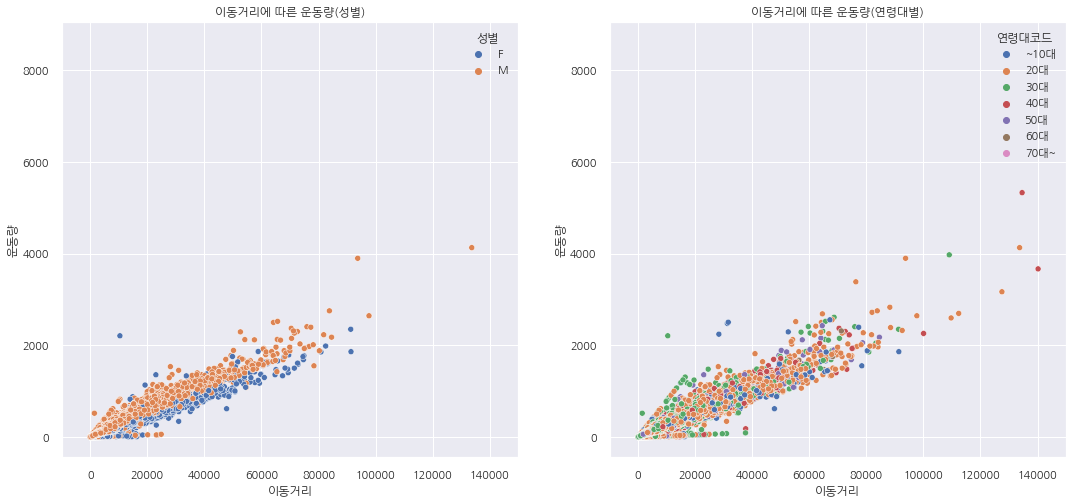

In [ ]:
# 운동량과 이동거리의 상관관계(runtime ~40s)
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')
ax[0].set_xlim(-10000, 150000)
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(data=bike3, x='이동거리', y='운동량', ax=ax[1], hue='연령대코드')
ax[1].set_xlim(-10000, 150000)
ax[1].set_title('이동거리에 따른 운동량(연령대별)')
plt.show()

In [ ]:
# 대여 일자 데이터를 년 월 일로 나누기
bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [ ]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여년,대여월,대여일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞,2021,1,1
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞,2021,1,1
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞,2021,1,1
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구,2021,1,1
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞,2021,1,1


In [ ]:
# 성별에 따른 사용시간 합계를 대여일별로 집계
bike3.pivot_table(index=bike3['대여일'], columns=bike3['성별'], values='사용시간', aggfunc=sum)

성별,F,M
대여일,,
1,154530,234399
2,153598,234173
3,131245,217678
4,156668,267946
5,122408,222853
6,95435,166657
7,15144,45589
8,23995,66331
9,31465,82345


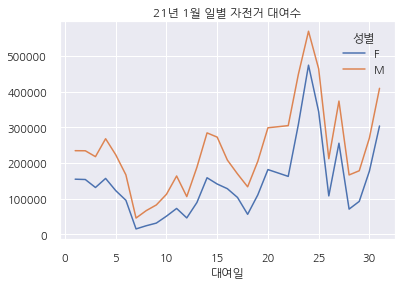

In [ ]:
# 위 정보를 바탕으로 시각화
bike_fm = bike3.pivot_table(index=bike3['대여일'], columns=bike3['성별'], values='사용시간', aggfunc=sum)
bike_fm.plot(title = '21년 1월 일별 자전거 대여수', rot=0)
plt.show()

In [ ]:
# 구별 거치대 개수
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD


In [ ]:
# lcd + qr 거치대수 
bike1['총거치대수'] = bike1['거치대수lcd'] + bike1['거치대수qr']

In [ ]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0


In [ ]:
# 구별 설치 거치대의 개수
bike_sum1 = bike1.groupby(['자치구'])[('총거치대수')].sum().reset_index().sort_values(by='총거치대수', ascending=False)
bike_sum1 = bike_sum1.set_index('자치구')
bike_sum1

,총거치대수
자치구,
강서구,2029.0
송파구,1770.0
서초구,1631.0
영등포구,1495.0
강남구,1482.0
마포구,1310.0
구로구,1184.0
종로구,1168.0
강동구,1152.0


In [ ]:
# folium으로 지도위에 대여소 분포 확인
import json
import folium
import warnings

geo_path = '/content/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
geo_str

{'features': [{'geometry': {'coordinates': [[[126.1701670531016,
       33.27833920373795],
      [126.17796199822318, 33.28904450342792],
      [126.20366562455006, 33.292582069125935],
      [126.23227804627976, 33.28054651709448],
      [126.27081469983565, 33.29305651947374],
      [126.28692516789717, 33.3095121006344],
      [126.32582807936741, 33.32307849544494],
      [126.33863040850332, 33.33700002289742],
      [126.37692773779688, 33.34348978209229],
      [126.42008790072302, 33.33448285889923],
      [126.43967991919219, 33.34042205120408],
      [126.44742456956253, 33.35529267692266],
      [126.4918716225209, 33.351283204155564],
      [126.54001194569452, 33.35949354681064],
      [126.55310458705854, 33.368769331336765],
      [126.5830715764017, 33.368027779973275],
      [126.65655971322707, 33.39658294968576],
      [126.68911351796443, 33.39691133705054],
      [126.70784071345439, 33.41819831436605],
      [126.73472429940135, 33.422146338653775],
      [126.75

In [ ]:
seoul_bike1 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

seoul_bike1.choropleth(
    geo_data = geo_str,
    data = bike_sum1['총거치대수'],
    columns = ['자치구', '총거치대수'],
                fill_color = 'YlGnBu',
                key_on = 'feature.properties.name',
                legend_name = 'Number of Parking lots (%)')

seoul_bike1

In [ ]:
# 구별 대여 건수 나타내기
bike22['대여소번호'] = pd.to_numeric(bike22['대여소번호'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,2015-10-07,16.0,0.0,LCD,16.0


In [ ]:
bike22.head()

,대여소 명,대여 일자 / 월,대여 건수,대여소번호,대여소명_new
0,2301. 현대고등학교 건너편,202007,3997,2301,현대고등학교 건너편
1,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250,2302,교보타워 버스정류장(신논현역 3번출구 후면)
2,2303. 논현역 7번출구,202007,863,2303,논현역 7번출구
3,2304. 신영 ROYAL PALACE 앞,202007,334,2304,신영 ROYAL PALACE 앞
4,2305. MCM 본사 직영점 앞,202007,436,2305,MCM 본사 직영점 앞


In [ ]:
# 대여소명에 구 붙이기
bike_merge = pd.merge(bike1, bike22, left_on='대여소번호', right_on='대여소번호')

In [ ]:
bike_merge.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수,대여소 명,대여 일자 / 월,대여 건수,대여소명_new
0,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202007,1556,경복궁역 7번출구 앞
1,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202008,997,경복궁역 7번출구 앞
2,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202009,1338,경복궁역 7번출구 앞
3,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202010,1478,경복궁역 7번출구 앞
4,301,경복궁역 7번출구 앞,종로구,2015-10-07,16.0,0.0,LCD,16.0,301. 경복궁역 7번출구 앞,202011,1072,경복궁역 7번출구 앞


In [ ]:
# 필요한 컬럼만 추출
bike_merge = bike_merge.drop(['설치시기', '대여소 명'], axis = 1, inplace=False)

In [ ]:
# 202101 데이터만 사용
bike_merge01 = bike_merge[bike_merge['대여 일자 / 월'] == 202101]

In [ ]:
bike_merge01.head(5)

,대여소번호,대여소명,자치구,거치대수lcd,거치대수qr,운영방식,총거치대수,대여 일자 / 월,대여 건수,대여소명_new
6,301,경복궁역 7번출구 앞,종로구,16.0,0.0,LCD,16.0,202101,417,경복궁역 7번출구 앞
13,302,경복궁역 4번출구 뒤,종로구,12.0,0.0,LCD,12.0,202101,714,경복궁역 4번출구 뒤
20,303,광화문역 1번출구 앞,종로구,8.0,0.0,LCD,8.0,202101,590,광화문역 1번출구 앞
27,304,광화문역 2번출구 앞,종로구,0.0,7.0,QR,7.0,202101,393,광화문역 2번출구 앞
34,305,종로구청 옆,종로구,16.0,0.0,LCD,16.0,202101,514,종로구청 옆


In [ ]:
# 자치구 별 대여건수, 반납건수 집계하기
bike_sum2 = bike_merge01.groupby(['자치구'])[('대여 건수')].sum().reset_index().sort_values(by='대여 건수', ascending=False)
bike_sum2 = bike_sum2.set_index('자치구')
bike_sum2

,대여 건수
자치구,
강서구,75019
영등포구,64359
송파구,54819
마포구,48131
양천구,43330
노원구,41993
광진구,38028
성동구,37459
종로구,35283


In [ ]:
# 지도로 시각화
seoul_bike2 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='openstreetmap')

seoul_bike2.choropleth(
    geo_data = geo_str,
    data = bike_sum2['대여 건수'],
    columns = [bike_sum2.index, bike_sum2['대여 건수']],
                fill_color = 'PuRd',
                key_on = 'feature.properties.name')

seoul_bike2

## **Review**

- 따릉이 데이터를 살펴본 결과<br/>
  석수역 1번출구앞 에서 대여한 따릉이의 이동거리가 가장 크고, <br/>
  IBK기업은행 석수역 지점 앞 대여소 따릉이의 이용시간이 가장 길었다.

- 따릉이를 이용한 남녀 간 이동거리 분포에 큰 차이는 없었으나, 남성의 운동량이 더 많게 나타났다.

- 따릉이를 많이 이용하는 성별은 전반적으로 남성이 여성보다 따릉이를 더 많이 이용했다

- 양천구, 관악구의 경우 거치대 수의 비해 대여건수가 높게 나왔다